In [154]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib

In [155]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [156]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [157]:
#Normalizing the values in data
X_train = X_train / 255
X_test = X_test / 255

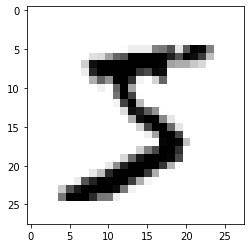

In [158]:
plt.imshow(X_train[0],cmap=matplotlib.cm.binary)

In [159]:
n=28*28
X_train_flattened = X_train.reshape(len(X_train), n)
X_test_flattened = X_test.reshape(len(X_test), n)

Model Building Using neural ***networks***

In [160]:
ML_model = keras.Sequential([keras.layers.Dense(100, input_shape=(784,), activation='relu'),
                          keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])

ML_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ML_model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2686 - accuracy: 0.9243
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1196 - accuracy: 0.9653
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0849 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0638 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0506 - accuracy: 0.9848


In [161]:
ML_model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0755 - accuracy: 0.9769


[0.07550098747015, 0.9768999814987183]

In [162]:
def predict_number(test,i):
  names={0: 'zero', 1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five', 6: 'six', 7: 'seven', 8: 'eight', 9: 'nine'}
  test_flat=test.reshape(1, 28*28)
  number=np.argmax(ML_model.predict(test_flat[:1]))
  plt.subplot(5,5,i+1)
  plt.imshow(test,cmap=matplotlib.cm.binary)
  plt.title(names[number],fontsize=14,color='red')
  plt.axis('off')

## OUTPUT

Enter a number to select 25 test cases  52


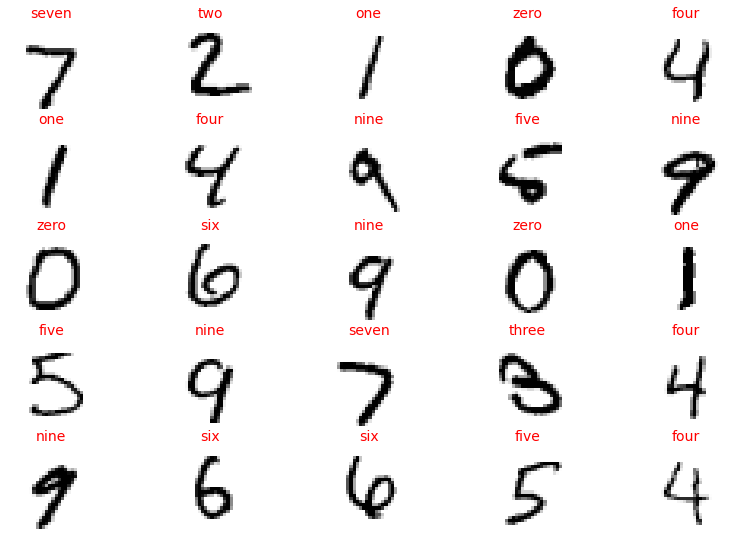

In [165]:
n=int(input('Enter a number to select 25 test cases  '))
for i in range(25):
  predict_number(X_test[i],i)
plt.subplots_adjust(right=1.9, top=1.9)
